# Obesity and health issues: how the food we eat influences health conditions in society
### Erick Alcalá (A01025213@itesm.mx), Emiliano Cabrera (A01025453@itesm.mx), Andrew Dunkerley (e-mail), Do Hyun Nam (A01025276@itesm.mx)
Professor: Saúl Juárez Ordóñez
Tecnologico de Monterrey, School of Engineering and Sciences, Sciences Department
Av. Carlos Lazo 100, Santa Fe, 01389, Mexico City, Mexico

## Abstract
The importance of nutritional values -sugar, carbohydrates, sodium, fats, calories- in determining what we consume is vital, since this information can help us make informed decisions on what we decide to give to our bodies. Contemporary societies have become heavily attached and dependant on processed foods, that are often deemed unhealthy and lead to health issues. Using the help of technology, the research aims to be well-informed of the nutritional facts our eating habits convey, and to be able to calculate and visualize how much energy (calories) we are consuming using a linear regression model, hoping to help the community to be knowledged of how our eating habits been evolving. The model takes into acount hte fats, proteins, carbohydrates, and sodium measurements in our food, to predict the amount of calories it contains. This model was trained using a nutritional facts database. 

Keywords: `Linear Regression` `Health` `Nutrition` `Calories`



## 1. Introduction
The human body is like a machine, and as every machine, it needs “something” to keep working, our something is food. Calories, sugar, sodium, fats, carbohydrates, among others make the nutritional value of a food. The human body needs a certain amount of nutrients to properly work and the excess of any of the previously mentioned nutrients could have consequences on the function of the body, and could cause diseases that endanger our life, like obesity or diabetes. That’s why our eating habits are important and the information of what is the nutritional value of each edible product should determine if we’re going to buy it or not. The access to this information is easily accessible in almost every product, this is thanks to the regulations and laws passed by the governments to force the business to include the nutritional value. In spite of this, the understanding of this information can be difficult, so it is often ignored. Now we have technology, which can help us make a more informed decision on what we consume. Coding can make the information more organized and easy to access, as it can help with categorizing the different nutritional values and help the consumer make a decision, giving them the information they ask for or need to know about, this is what this code tries to do. 


## 2. Theoretical Framework

Mexico is facing multiple epidemics at the same time, the one that arrived this year, COVID-19, and two that have been affecting the country for a lot of years, obesity and overweight. According to the ENSANUT, 72.7% of female adults are overweight or obese, while in male adults the percentage is 69.4%. The COVID-19 pandemic has put this situation in the spotlight once again, since according to the General Epidemiologist Directorate, of the 105,459 COVID-19 deaths, 33.77% are obesity related, 45.54% and 38.57% are related to diabetes and hypertension, which are direct consequences of obesity and overweightness. Therefore, the government is now, more than ever, searching for ways to tackle this problem.


### 2.1. Public policies
Public policies, at the federal and state level, are being analyzed and voted upon in the different levels of government in the country. Two of them stand out, the first one being the new nutritional labeling in the pre-packed products, this new labeling included octagonal stickers with a warning of  “High in sodium”, “High in sugar”, among others. Despite the fact that this change was approved by the chamber of deputies last year, it was enforced on the 1st of October of this year. The policy had a lot of critics, saying that yet again the government was ignoring the main fact of why obesity and overweight are so rampant in Mexico, and that is poverty. (Aguirre, 2019)


The Second public policy that stands out, was one approved in the southern state of Oaxaca. The new law prohibits the distribution, sale, supply or gift of junk food and sugary drinks to underage kids. This law was debated for one year, but the current pandemic and its effects on public health were the perfect final argument to approve the law. The law was praised by the UN and UNICEF, but it was criticized by business organizations, alleging it would be a huge blow for the economy of the state. (Galván, 2020) The government is hurting the small and big business in a moment where they need all the help they can get, even more in a state where poverty is rampant and small businesses are family owned and more at risk of closing. Is it okay to affect hundreds of families and businesses to try to tackle obesity and overweight in children? That would depend on everyone’s ethics and morals.

### 2.2. Technological tools
Technology is something important that the government is forgetting to use. We live in a new era, an era of technological advancements. The tools to create new codes to help the rampant obesity and overweight problem are within reach, codes to provide new information for the consumers about nutrition facts of what they are consuming, to predict their caloric load to help the consumer make the right choice of what to eat. That is precisely what the code in this project makes. 

## 3. Analysis and results

Using Python's Numpy, Pandas, and Scikit modules we were able to analyse a nutritional facts database from various food items. Matplotlib and Seaborn modules were used to visualize our data. Then using a linear regression prediction model, we could make a revision on whether our model was designed correctly and identify biases and flaws from the testing.

In [9]:
# Importing the necessary modules for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
import pandas_profiling
sns.set()
from sympy import latex

In [10]:
# Creating dataframe from the data parsed from the database in a .csv format
nut = pd.read_csv('nutrition.csv', index_col=1) # Dataframe named nut as an abbreviation of nutrition
print(f'Dataframe of size {nut.shape[0]} and {nut.shape[1]}')
#nut.profile_report() # Returns a summary of the dataframe's characteristics, it appears commented due to it being slow

# Usinf the dropna method, we clean data with undefined values
newnut = nut.dropna()
# Filter dataframe leaving just the columns of interest for this research
newnut2 = newnut[['calories','total_fat','carbohydrate','sodium','protein']]

# Converting all data to a unified unit, being the gram (g)
newnut2['sodium'] = newnut2['sodium'].str.rstrip('mg').astype('float')
newnut2['total_fat'] = newnut2['total_fat'].str.rstrip('g').astype('float')
newnut2['carbohydrate'] = newnut2['carbohydrate'].str.rstrip('g').astype('float')
newnut2['protein'] = newnut2['protein'].str.rstrip('g').astype('float')
newnut2['sodium'] = newnut2['sodium']/1000
# Newnut2 corresponds to the filtered and cleaned nut dataframe

# Creating test samples of four different kinds of food
nut_nuts = newnut2.loc[['Nuts, pecans']]
nut_ramen = newnut2.loc[['Soup, dry, beef flavor, ramen noodle']]
nut_teff = newnut2.loc[['Teff, uncooked']]
nut_sherbet = newnut2.loc[['Sherbet, orange']]
newnut3 = newnut2.loc[['Nuts, pecans','Soup, dry, beef flavor, ramen noodle','Teff, uncooked','Sherbet, orange']]


Dataframe of size 8789 and 76


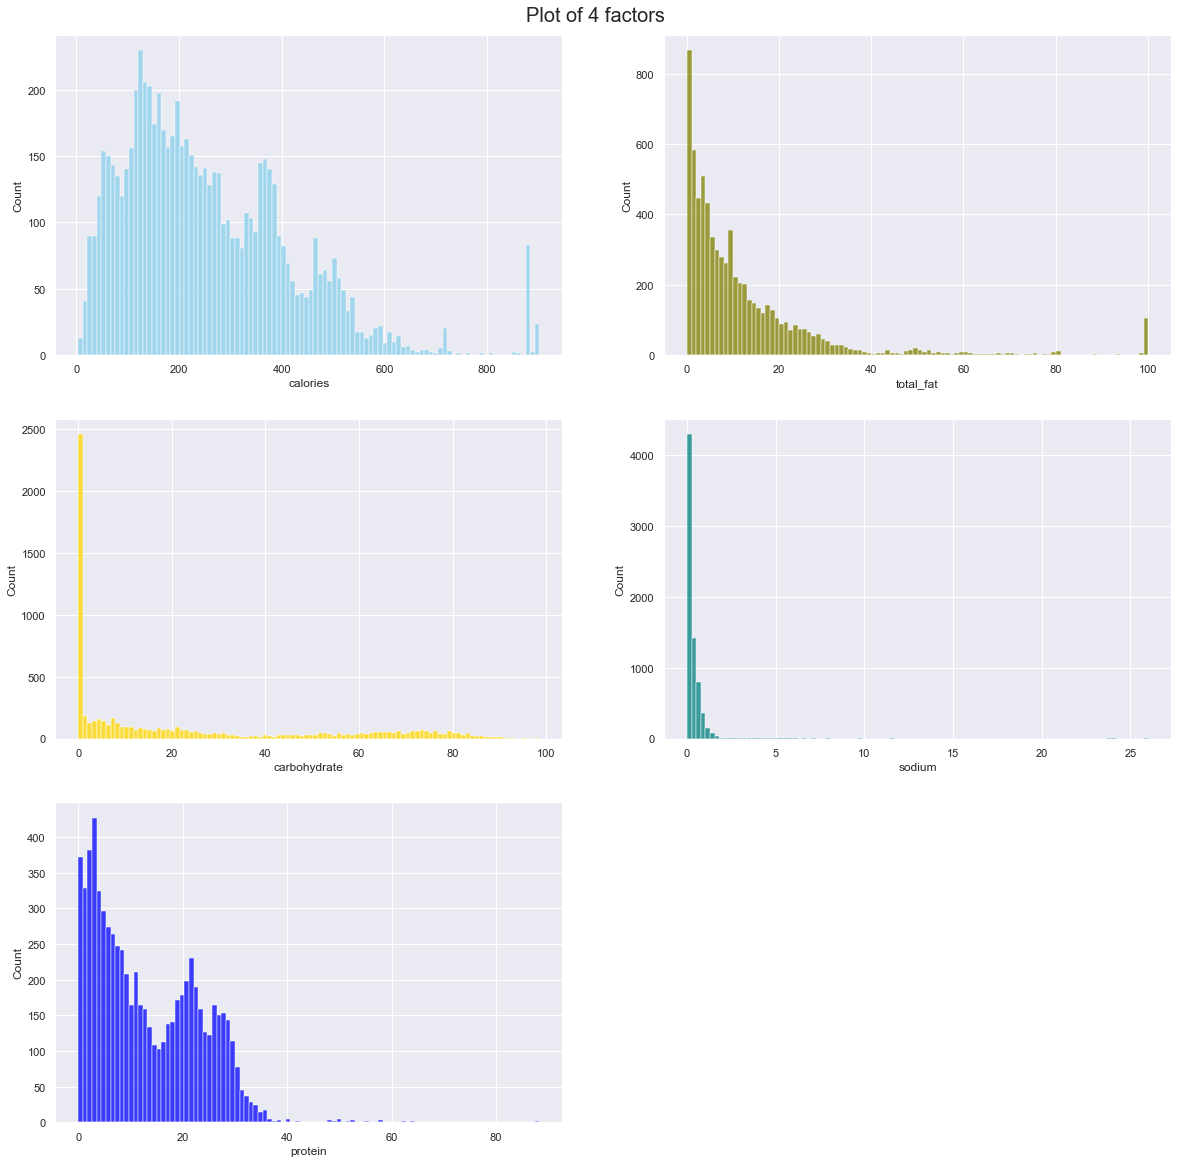

In [11]:
#%% Plotting the histogram relevant to each factor of analysis
fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=False)

fig.suptitle('Plot of 4 factors', y=0.9, fontsize=20)

sns.histplot(newnut2["calories"], color="skyblue", stat='count', bins=100, ax=axes[0, 0])
sns.histplot(newnut2["total_fat"], color="olive", stat='count', bins=100, ax=axes[0, 1])
sns.histplot(newnut2["carbohydrate"], color="gold", stat='count', bins=100, ax=axes[1, 0])
sns.histplot(newnut2["sodium"], color="teal", stat='count', bins=100,ax=axes[1, 1])
sns.histplot(newnut2["protein"], color="blue", stat='count', bins=100,ax=axes[2, 0])
fig.delaxes(axes[2,1])

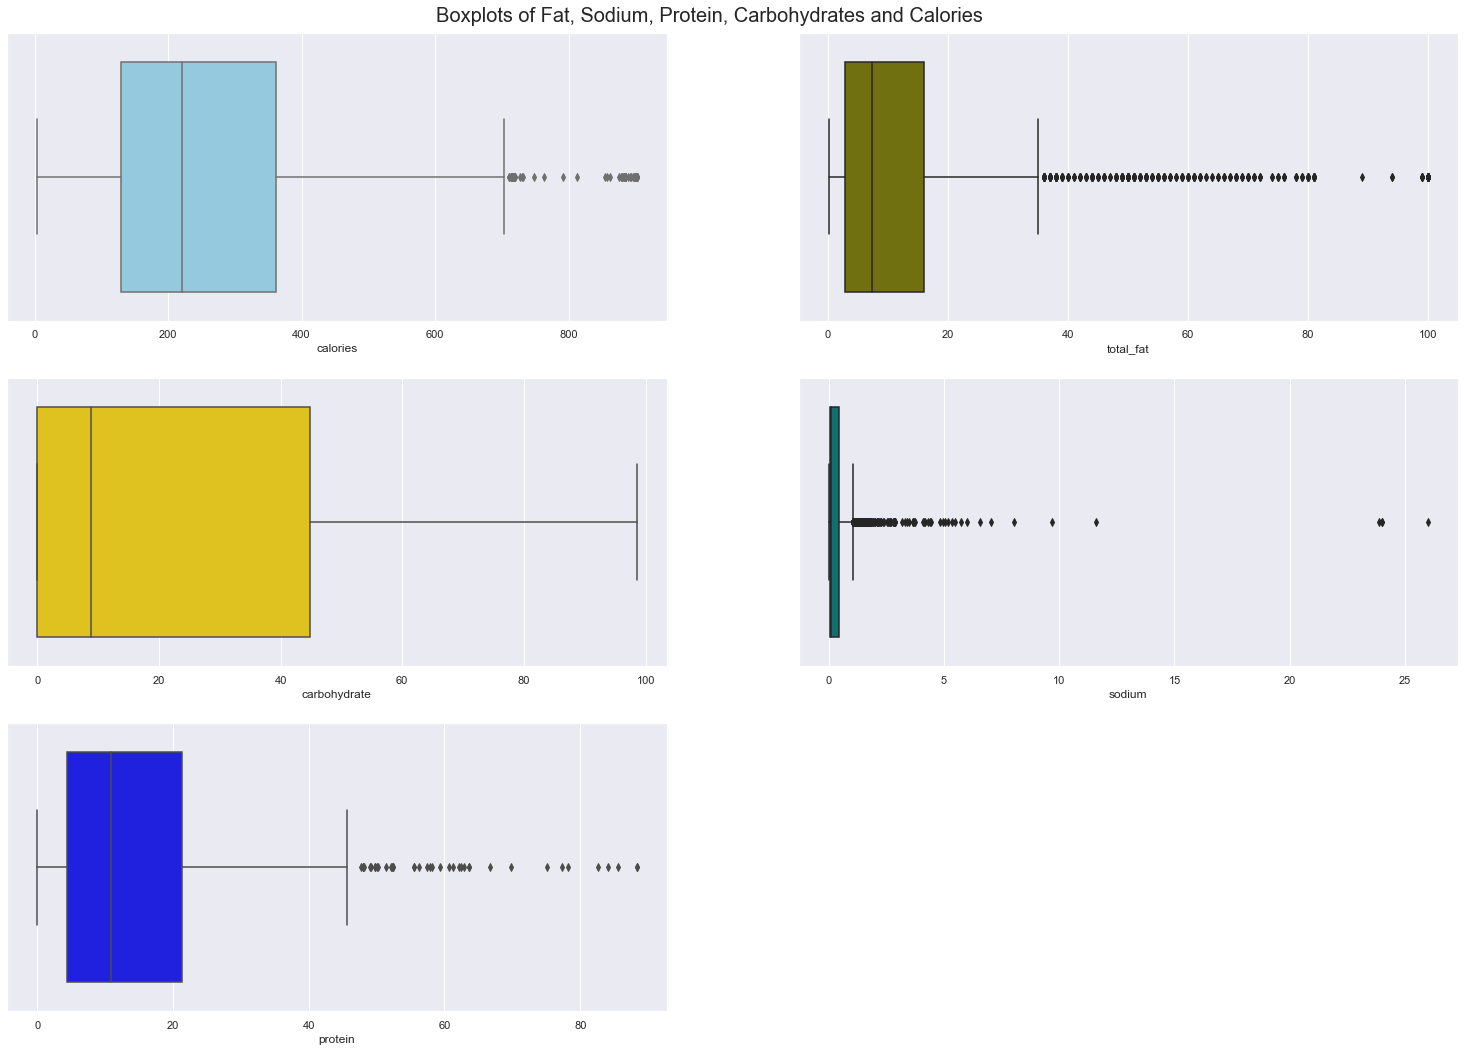

In [12]:
# Plotting a boxplot that helps with the visualization of central tendencies
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(26,18))

f.suptitle('Boxplots of Fat, Sodium, Protein, Carbohydrates and Calories', y=0.9, fontsize=20)
sns.boxplot(x=newnut2['calories'], color="skyblue", ax=axes[0, 0])
sns.boxplot(x=newnut2['total_fat'], color="olive", ax=axes[0, 1])
sns.boxplot(x=newnut2['carbohydrate'], color="gold", ax=axes[1, 0])
sns.boxplot(x=newnut2['sodium'], color="teal", ax=axes[1, 1])
sns.boxplot(x=newnut2['protein'], color="blue", ax=axes[2, 0])

f.delaxes(axes[2,1])

In [13]:
#Only removing extreme outliers
Q1 = newnut2.quantile(0.25)
Q3 = newnut2.quantile(0.75)
IQR = Q3 - Q1

finalnut = newnut2[~((newnut2 < (Q1 - 2.5 * IQR)) |(newnut2 > (Q3 + 2.5 * IQR))).any(axis=1)]

# -------------------------------------------------------------------------------------------------

len_after = len(finalnut)
len_before = len(newnut2)
len_difference = len(newnut2) - len(finalnut)
print('We reduced our data size from {} foods by {} foods to {} foods.'.format(len_before, len_difference, len_after))


We reduced our data size from 7199 foods by 423 foods to 6776 foods.


In [14]:
#%% Linear fit
from sklearn.linear_model import LinearRegression

X = finalnut[['total_fat', 'carbohydrate', 'sodium', 'protein']] 
Y = finalnut['calories']

# Using the Scikit.learn module, we obtain a linear regression model
calories_prediction = LinearRegression()
calories_prediction.fit(X, Y)

print('Intercept: \n', calories_prediction.intercept_)
print('Coefficients: \n', calories_prediction.coef_)

Intercept: 
 1.7399148298757439
Coefficients: 
 [8.92319578 3.79365684 3.56291124 4.02584079]


### 4. Testing with four different foods eating in our daily life
The predictions were done based on one portion of each food.

### Chocolate-coated raisins from Kirkland
<img src="img/pasas.jpeg" style="width: 200px"/>
Portion of 100g

In [15]:
fat1 = 23
sod1 =0.1
prot1 = 4
carbo1 = 63
print ('Number of calories: \n', calories_prediction.predict([[fat1, sod1, pro1, carbo1]]))

Number of calories: 
 [475.23239791]


### Salmas (maize toasts)
<img src="img/maicena.jpeg" style="width: 200px"/>
Portion of 6g

In [16]:
fat2 = 0
sod2 = 0.03
prot2 = 0
carbo2 = 4
print ('Number of calories: \n', calories_prediction.predict([[fat2, sod2, prot2, carbo2]]))

Number of calories: 
 [17.95708768]


### Cerial (Frutilupis)
<img src="img/cereal.jpeg" style="width: 200px"/>
Portion of 30g

In [17]:
fat3 = 1
sod3 = 0.105
prot3 = 1
carbo3 = 25
print ('Number of calories: \n', calories_prediction.predict([[fat3, sod3, prot3, carbo3]]))

Number of calories: 
 [115.27037546]


### Parmasan cheese
<img src="img/parmasan.jpeg" style="width: 200px"/>
Portion of 5g

In [21]:
fat4 = 1.5
sod4 = 0.075
prot4 = 2
carbo4 = 0
print ('Number of calories: \n', calories_prediction.predict([[fat4, sod4, prot4, carbo4]]))

Number of calories: 
 [22.53505525]


## 6. Conclusion
As we can see, the models seems to be able to predict thoroughly the calorific content of the food used as test datasets. The margin of error rounds up to about 1 kcal when predicting, proving that the model has effectively applied what has learned from the training data set to reach its objective. Being that said, we can trustfully say that the model could be applied on real life situations, such as foods that don't have nutritional facts or in restaurants, which is very uncommon for them to show the calorific values of their meals and dishes.

With the assistance of this program, we can help people make informed decisions on what they put into their bodies, we can try to influence their eating habits and try to change them for the better. Information saves lives, in a country where obesity and overweightness are out of control, there’s a chance to make a difference. Knowing what we are eating and giving to our bodies, can help us reconsider if it's really worth it or if there’s a healthier option, one that provides the nutrients we need to stay healthy. The human body is like a machine, so let's take care of it as it deserves. 


## 7. References
Aguirre, S. (2019). Nuevo etiquetado en alimentos, ¿qué se aprobó y qué significa este cambio? Animal Político. Retrieved from: https://www.animalpolitico.com/elsabueso/nuevo-etiquetado-alimentos-significado/

Dirección General de Epidemiología. (30 de septiembre de 2020). Covid-19 México. Gobierno de México. Retrieved from: https://coronavirus.gob.mx/datos/

El Financiero. (2020). ¿Cómo es el nuevo etiquetado de productos que entra en vigor este 1 de octubre? Retrieved from: https://www.elfinanciero.com.mx/nacional/como-es-el-nuevo-etiquetado-de-productos-que-entra-en-vigor-este-1-de-octubre


Federación Mexicana de Diabetes, A.C. (s.f.). Estadísticas en México. Retrieved from:
http://fmdiabetes.org/estadisticas-en-mexico/

Galván, M. (2020). El Congreso de Oaxaca prohíbe la venta de comida chatarra a menores. Expansión Política. Retrieved from: https://politica.expansion.mx/estados/2020/08/05/el-congreso-de-oaxaca-prohibe-la-venta-de-comida-chatarra-a-menores

Portilla Camacho, B. (2016). Encuesta Nacional de Salud y Nutrición de Medio Camino. ENSANUT. Retrieved from: http://fmdiabetes.org/wpcontent/uploads/2018/04/ensanut.jpg


https://www.longdom.org/open-access/modern-diet-and-its-impact-on-human-health-2155-9600-1000430.pdf 
